In [ ]:
import requests

url = "http://localhost:8000/upload/"
file_path = "E:/python_prj/evaluation/img_1.png"

with open(file_path, "rb") as f:
    files = {"file": ("img_1.png", f, "image/png")}
    response = requests.post(url, files=files)

print(response.json())


In [29]:

from data.ImageCaptionDataset import ImageCaptionDataset
from torchvision import transforms
TEST_DATA_PATH = "../data/test_data_preprocessed.pkl"
transforms = transforms.Compose([
            transforms.Resize((126, 126)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
test_dataset = ImageCaptionDataset(
    TEST_DATA_PATH,
    vocab.w2i,
    vocab.max_length_caption,
    transform= transforms)
train_dataset = ImageCaptionDataset(
    TRAIN_DATA_PATH,
    vocab.w2i,
    vocab.max_length_caption,
    transform= transforms)

(np.float64(-0.5), np.float64(125.5), np.float64(125.5), np.float64(-0.5))

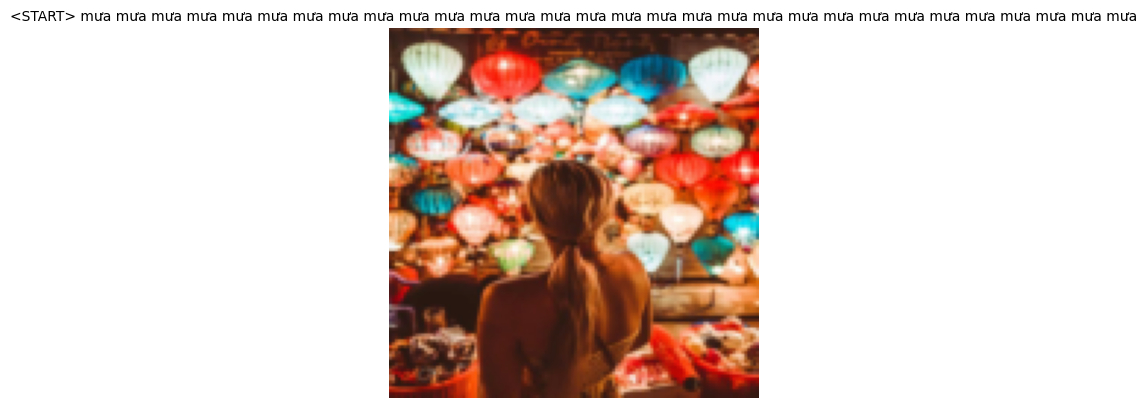

In [30]:
import matplotlib.pyplot as plt



image_tensor, _ = train_dataset[10]
image_input = image_tensor.unsqueeze(0)
caption = generate_caption(model, image_input, vocab)

# Chuyển tensor ảnh về PIL Image để hiển thị
image_np = image_tensor.permute(1, 2, 0).cpu().numpy()
image_np = image_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
image_np = (image_np * 255).clip(0, 255).astype("uint8")

plt.imshow(image_np)
plt.title(" ".join(caption), fontsize=10)
plt.axis("off")

